Agenda

    - A quick recap to Qcut and Cut
    - Data Types in Pandas
    - Duplicate Handling
    - Ways to Handle Missing values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv(r'WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Qcut

qcut= The pandas documentation describes qcut as a “Quantile-based discretization function.” This basically means that qcut tries to divide the data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.

The simplest use of qcut is to define the number of quantiles and let pandas figure out how to divide up the data. In the example below, we tell pandas to create 4 equal sized groupings of the data.

In each case, there are an equal number of observations in each bin. Pandas does the math behind the scenes to figure out how wide to make each bin.

In [3]:
df['Qcut Income package'] = pd.qcut(df['MonthlyIncome'], q=5, labels=['copper','silver', 'gold', 'platinum', 'diamond'])

In [4]:
df['Qcut Income package'].value_counts()

Qcut Income package
copper      294
silver      294
gold        294
platinum    294
diamond     294
Name: count, dtype: int64

In [5]:
294*5

1470

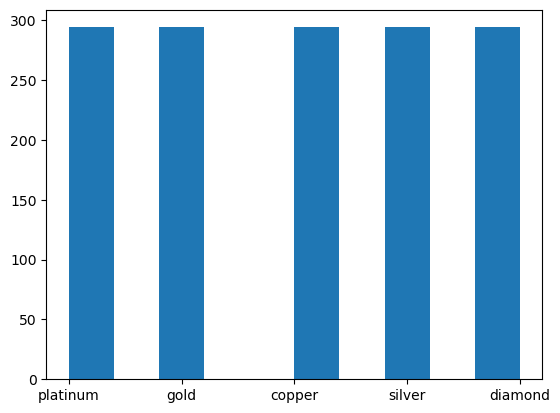

In [6]:
plt.hist(df['Qcut Income package'])
plt.show()

## Cut

The major distinction is that qcut will calculate the size of each bin in order to make sure the distribution of data in the bins is equal. In other words, all bins will have (roughly) the same number of observations but the bin range will vary.

On the other hand, cut is used to specifically define the bin edges. There is no guarantee about the distribution of items in each bin. In fact, you can define bins in such a way that no items are included in a bin or nearly all items are in a single bin.

In real world examples, bins may be defined by business rules. For a frequent flier program, 25,000 miles is the silver level and that does not vary based on year to year variation of the data. If we want to define the bin edges (25,000 - 50,000, etc) we would use cut.

In [7]:
print(df['MonthlyIncome'].max())
print(df['MonthlyIncome'].min())

19999
1009


In [8]:
cut_bins = [1000, 4000, 6000, 12000,15000, 200000]
df['Cut Income package'] = pd.cut(df['MonthlyIncome'], bins=cut_bins, labels=['copper','silver', 'gold', 'platinum', 'diamond'])

In [9]:
df[['MonthlyIncome','Cut Income package']]

,MonthlyIncome,Cut Income package
0,5993,silver
1,5130,silver
2,2090,copper
3,2909,copper
4,3468,copper
...,...,...
1465,2571,copper
1466,9991,gold
1467,6142,gold
1468,5390,silver


In [10]:
df['Cut Income package'].value_counts()

Cut Income package
copper      543
silver      371
gold        361
diamond     133
platinum     62
Name: count, dtype: int64

In [11]:
df['Cut Income package'].dtypes

CategoricalDtype(categories=['copper', 'silver', 'gold', 'platinum', 'diamond'], ordered=True)

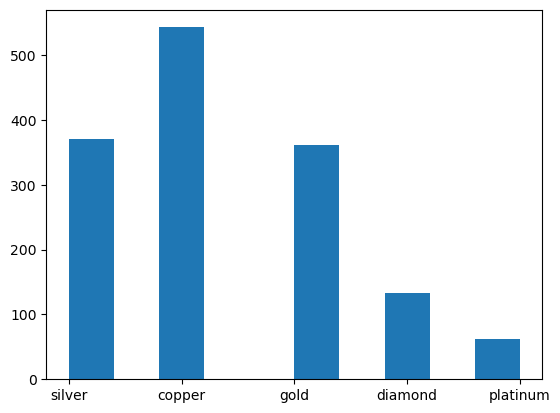

In [12]:
plt.hist(df['Cut Income package'])
plt.show()

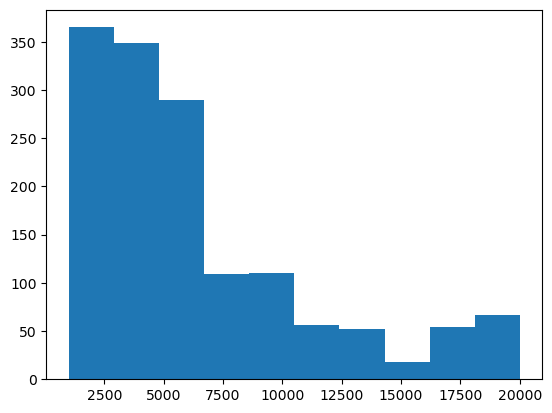

In [13]:
plt.hist(df['MonthlyIncome'])
plt.show()

### Qcut vs Cut

    - If you want equal distribution of the items in your bins, use qcut. 
    - If you want to define your own numeric bin ranges, then use cut.

The major distinction is that qcut will calculate the size of each bin in order to make sure the distribution of data in the bins is equal. In other words, all bins will have (roughly) the same number of observations but the bin range will vary.

On the other hand, cut is used to specifically define the bin edges. There is no guarantee about the distribution of items in each bin. In fact, you can define bins in such a way that no items are included in a bin or nearly all items are in a single bin.

In real world examples, bins may be defined by business rules. For a frequent flier program, 25,000 miles is the silver level and that does not vary based on year to year variation of the data. If we want to define the bin edges (25,000 - 50,000, etc) we would use cut . We can also use cut to define bins that are of constant size and let pandas figure out how to define those bin edges.

#### Read data again to ignore the bin columns

In [14]:
df = pd.read_csv(r'WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data Preprocessing

In [15]:
df.columns.str.strip()
#The str.strip() function is used to remove leading and trailing characters.
#Strip whitespaces (including newlines)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [16]:
s = pd.Series(['1. Bat.  ', '2. Dog!\n', '3. fox?\t', np.nan])
s
#a set of specified characters from each string in the Series/Index from left and right sides.

0    1. Bat.  
1    2. Dog!\n
2    3. fox?\t
3          NaN
dtype: object

In [17]:
s.str.strip('123.!? \n\t')

0    Bat
1    Dog
2    fox
3    NaN
dtype: object

In [18]:
s = pd.Series(['1. Bat cy', '2. Dog cy', '3. fox cy',np.nan])
s1=s.str.replace("cy","")
s1

0    1. Bat 
1    2. Dog 
2    3. fox 
3        NaN
dtype: object

## Data Types in Pandas

In [19]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [21]:
# select numerical columns
df_numeric = df.select_dtypes(include="int64")
df_numeric.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [22]:
numeric_cols = df_numeric.columns.values
numeric_cols

array(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype=object)

In [23]:
# select non-numeric columns
df_non_numeric = df.select_dtypes(exclude=["int64","float64"])
non_numeric_cols = df_non_numeric.columns.values

In [24]:
non_numeric_cols

array(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype=object)

## Create a dataframe with all datatypes

In [25]:
data = pd.DataFrame({
'Object': ['Text', 'Another text', 'Yet another text'],
'Int64': [1, 2, 3],
'Float64': [1.1, 2.2, 3.3],
'Bool': [True, False, True],
'DateTime64': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03']),
'TimeDelta': pd.to_timedelta(['1 days', '2 days', '3 days']),
'Category': pd.Categorical(['A', 'B', 'A'])
})

In [26]:
data

,Object,Int64,Float64,Bool,DateTime64,TimeDelta,Category
0,Text,1,1.1,True,2023-01-01,1 days,A
1,Another text,2,2.2,False,2023-01-02,2 days,B
2,Yet another text,3,3.3,True,2023-01-03,3 days,A


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Object      3 non-null      object         
 1   Int64       3 non-null      int64          
 2   Float64     3 non-null      float64        
 3   Bool        3 non-null      bool           
 4   DateTime64  3 non-null      datetime64[ns] 
 5   TimeDelta   3 non-null      timedelta64[ns]
 6   Category    3 non-null      category       
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 382.0+ bytes


## How to deal with mixed types in Pandas columns

#### Using astype() function:
A crucial function in Pandas which is used to cast an object to a specified data type is known as astype() function. In this way, we will see how we can fix mixed data types using astype() function.

In [28]:
data_frame = pd.DataFrame( [['tom', 10], ['nick', '15'], ['juli', 14.8]], columns=['Name', 'Age'])

In [29]:
data_frame

,Name,Age
0,tom,10
1,nick,15
2,juli,14.8


In [30]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      object
dtypes: object(2)
memory usage: 180.0+ bytes


In [31]:
# Transforming mixed data types to single data type
data_frame["Age"] = data_frame["Age"].astype(int)
data_frame

,Name,Age
0,tom,10
1,nick,15
2,juli,14


In [32]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int32 
dtypes: int32(1), object(1)
memory usage: 168.0+ bytes


#### Using to_numeric() function:
The to_numeric() function is used to convert an argument to a numeric data type. In this way, we will see how we can fix mixed data types using to_numeric() function.

In [33]:
# Create the pandas DataFrame
data_frame = pd.DataFrame( [['tom', 10], ['nick', '15'], ['juli', 14.8]], columns=['Name', 'Age'])
data_frame


,Name,Age
0,tom,10
1,nick,15
2,juli,14.8


This code will convert the 'Age' column to numeric, and if any values cannot be converted to numeric (e.g., '15'), it will coerce them to NaN (Not a Number). Here, the errors='coerce' parameter is used to handle non-numeric values gracefully by converting them to NaN.

In [34]:
data_frame['Age'] = pd.to_numeric(data_frame['Age'], errors='coerce')

In [35]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    3 non-null      object 
 1   Age     3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 180.0+ bytes


In [36]:
data_frame['Age'] = pd.to_numeric(data_frame['Age'], errors='coerce').astype(int)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int32 
dtypes: int32(1), object(1)
memory usage: 168.0+ bytes


## Date Time formating

Example 1: Get Current Date and Time

In [37]:
import datetime

# get the current date and time
now = datetime.datetime.now()
print(now)

2024-04-22 15:51:06.441708


In [38]:
#Example 2: Get Current Date

# get current date
current_date = datetime.date.today()

print(current_date)

2024-04-22


Attributes of datetime Module
We can use the dir() function to get a list containing all attributes of a module.

Among all the attributes of datetime module, the most commonly used classes in the datetime module are:

datetime.datetime - represents a single point in time, including a date and a time.

datetime.date - represents a date (year, month, and day) without a time.

datetime.time - represents a time (hour, minute, second, and microsecond) without a date.

datetime.timedelta - represents a duration, which can be used to perform arithmetic with datetime objects.
https://www.programiz.com/python-programming/datetime

In [39]:
# Print today's year, month and day
from datetime import date

# date object of today's date
today = date.today() 

print("Current year:", today.year)
print("Current month:", today.month)
print("Current day:", today.day)

Current year: 2024
Current month: 4
Current day: 22


In [40]:
from datetime import datetime

a = datetime(2022, 12, 28, 23, 55, 59, 342380)

print("Year =", a.year)
print("Month =", a.month)
print("Hour =", a.hour)
print("Minute =", a.minute)
print("Timestamp =", a.timestamp())

Year = 2022
Month = 12
Hour = 23
Minute = 55
Timestamp = 1672253759.34238


### Consider a DataFrame with a date column

In [41]:

data = {'Date': ['2024-04-20', '2024-04-21', '2024-04-22']}
df = pd.DataFrame(data)
df

,Date
0,2024-04-20
1,2024-04-21
2,2024-04-22


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3 non-null      object
dtypes: object(1)
memory usage: 156.0+ bytes


In [43]:
# Convert the 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 156.0 bytes


### Python format datetime
Python strftime() Method

The strftime() method is defined under classes date, datetime and time. The method creates a formatted string from a given date, datetime or time object.

In [44]:
from datetime import datetime

# current date and time
now = datetime.now()
print(now)
t = now.strftime("%H:%M:%S")
print("Time:", t)

s1 = now.strftime("%m/%d/%Y, %H:%M:%S")
# mm/dd/YY H:M:S format
print("s1:", s1)

s2 = now.strftime("%d/%m/%Y, %H:%M:%S")
# dd/mm/YY H:M:S format
print("s2:", s2)

2024-04-22 15:51:06.640856
Time: 15:51:06
s1: 04/22/2024, 15:51:06
s2: 22/04/2024, 15:51:06


# Duplicates

In [45]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Duplicates handling 

In [46]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [47]:
df.duplicated().sum()

0

### Removing Duplicate Values
Once you have identified the duplicate values in your DataFrame column, you may want to remove them to avoid any issues in your analysis. You can use the drop_duplicates() method to remove the duplicate rows from your DataFrame.

#### keep:‘first’ or ‘last’ or False (default: ‘first’). 

It is used to specify which instance of the repeated rows is to be identified as a unique row.

In [48]:
# remove duplicate from the whole dataset
df.drop_duplicates(inplace=True)

In [49]:
df["Age"].duplicated().sum()

1427

In [50]:
# remove duplicate values in Age
df.drop_duplicates(subset=['Age'], keep='first',inplace=True)


In [51]:
df["Age"].duplicated().sum()

0

In [52]:
# remove duplicate values in EmployeeNumber
df.drop_duplicates(subset=['EmployeeNumber'], keep='first',inplace=True)


In [53]:
df["EmployeeNumber"].duplicated().sum()

0

## For example

In [54]:
import pandas as pd

In [55]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [56]:
df.duplicated() #rows are complete duplicate

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [57]:
df.duplicated().sum()

1

In [58]:
df.drop_duplicates(inplace=True)

In [59]:
df

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [60]:
df.drop_duplicates(subset=['brand'],keep="last")

,brand,style,rating
0,Yum Yum,cup,4.0
4,Indomie,pack,5.0


In [61]:
df.drop_duplicates(subset=['style']) #by default keep = first

,brand,style,rating
0,Yum Yum,cup,4.0
3,Indomie,pack,15.0


In [62]:
df.drop_duplicates(subset=['brand', 'style'], keep='last')

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
4,Indomie,pack,5.0


In [63]:
df

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


# Missing Values


Handling missing values is a critical step in data preprocessing and analysis. Missing data can
arise due to various reasons, such as errors in data collection, non-response in surveys, or
deletions of existing data entries. Pandas provides a comprehensive set of tools to deal with
missing values, enabling data scientists to clean, analyze, and impute missing data effectively.
The part of this manual introduces these tools and techniques for managing missing values in
Pandas DataFrames

In [64]:
df1=pd.read_csv('xeek_train_subset.csv')
df1.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,GR,NPHI,PEF,DTC,SP,ROP,DTS,DCAL,DRHO,LITHOFACIES
0,15/09/2013,494.528,437641.9688,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,80.200851,NaN,20.915468,161.131180,24.612379,34.636410,NaN,NaN,-0.574928,65000
1,15/09/2013,494.680,437641.9688,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,79.262886,NaN,19.383013,160.603470,23.895531,34.636410,NaN,NaN,-0.570188,65000
2,15/09/2013,494.832,437641.9688,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,74.821999,NaN,22.591518,160.173615,23.916357,34.779556,NaN,NaN,-0.574245,65000
3,15/09/2013,494.984,437641.9688,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,72.878922,NaN,32.191910,160.149429,23.793688,39.965164,NaN,NaN,-0.586315,65000
4,15/09/2013,495.136,437641.9688,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,71.729141,NaN,38.495632,160.128342,24.104078,57.483765,NaN,NaN,-0.597914,65000


In [65]:
df1.isnull().sum()

WELL                0
DEPTH_MD            0
X_LOC            7393
Y_LOC            7393
Z_LOC            7393
GROUP               0
FORMATION       21566
CALI              192
RSHA            71159
RMED             7642
RDEP             7393
RHOB            25145
GR                  0
NPHI            41473
PEF             32358
DTC               563
SP              39518
ROP              2744
DTS            121014
DCAL            76998
DRHO            27659
LITHOFACIES         0
dtype: int64

In [66]:
df1.isnull().mean()

WELL           0.000000
DEPTH_MD       0.000000
X_LOC          0.055504
Y_LOC          0.055504
Z_LOC          0.055504
GROUP          0.000000
FORMATION      0.161909
CALI           0.001441
RSHA           0.534235
RMED           0.057373
RDEP           0.055504
RHOB           0.188779
GR             0.000000
NPHI           0.311364
PEF            0.242932
DTC            0.004227
SP             0.296686
ROP            0.020601
DTS            0.908527
DCAL           0.578072
DRHO           0.207653
LITHOFACIES    0.000000
dtype: float64

Missing data as a percentage of total data
There is no straightforward method to get it, but all you can do it manually.

In [67]:
# % of values missing in each column
cols_list = []
values_list = []

for col in df1.columns:
    pct_missing = (df1[col].isnull().mean())*100
    cols_list.append(col)
    values_list.append(pct_missing)
    

In [68]:
pct_missing_df1 = pd.DataFrame({'col': cols_list,'pct_missing': values_list})
pct_missing_df1

,col,pct_missing
0,WELL,0.000000
1,DEPTH_MD,0.000000
2,X_LOC,5.550384
3,Y_LOC,5.550384
4,Z_LOC,5.550384
5,GROUP,0.000000
6,FORMATION,16.190934
7,CALI,0.144146
8,RSHA,53.423475
9,RMED,5.737323


# Missingno

Missingno is an excellent and simple to use Python library that provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe. This can be in the form of either a barplot, matrix plot, heatmap, or a dendrogram. The original publication for the library can be found https://joss.theoj.org/papers/10.21105/joss.00547


In [69]:
#!pip install missingno

In [70]:
import missingno as msno

<Axes: >

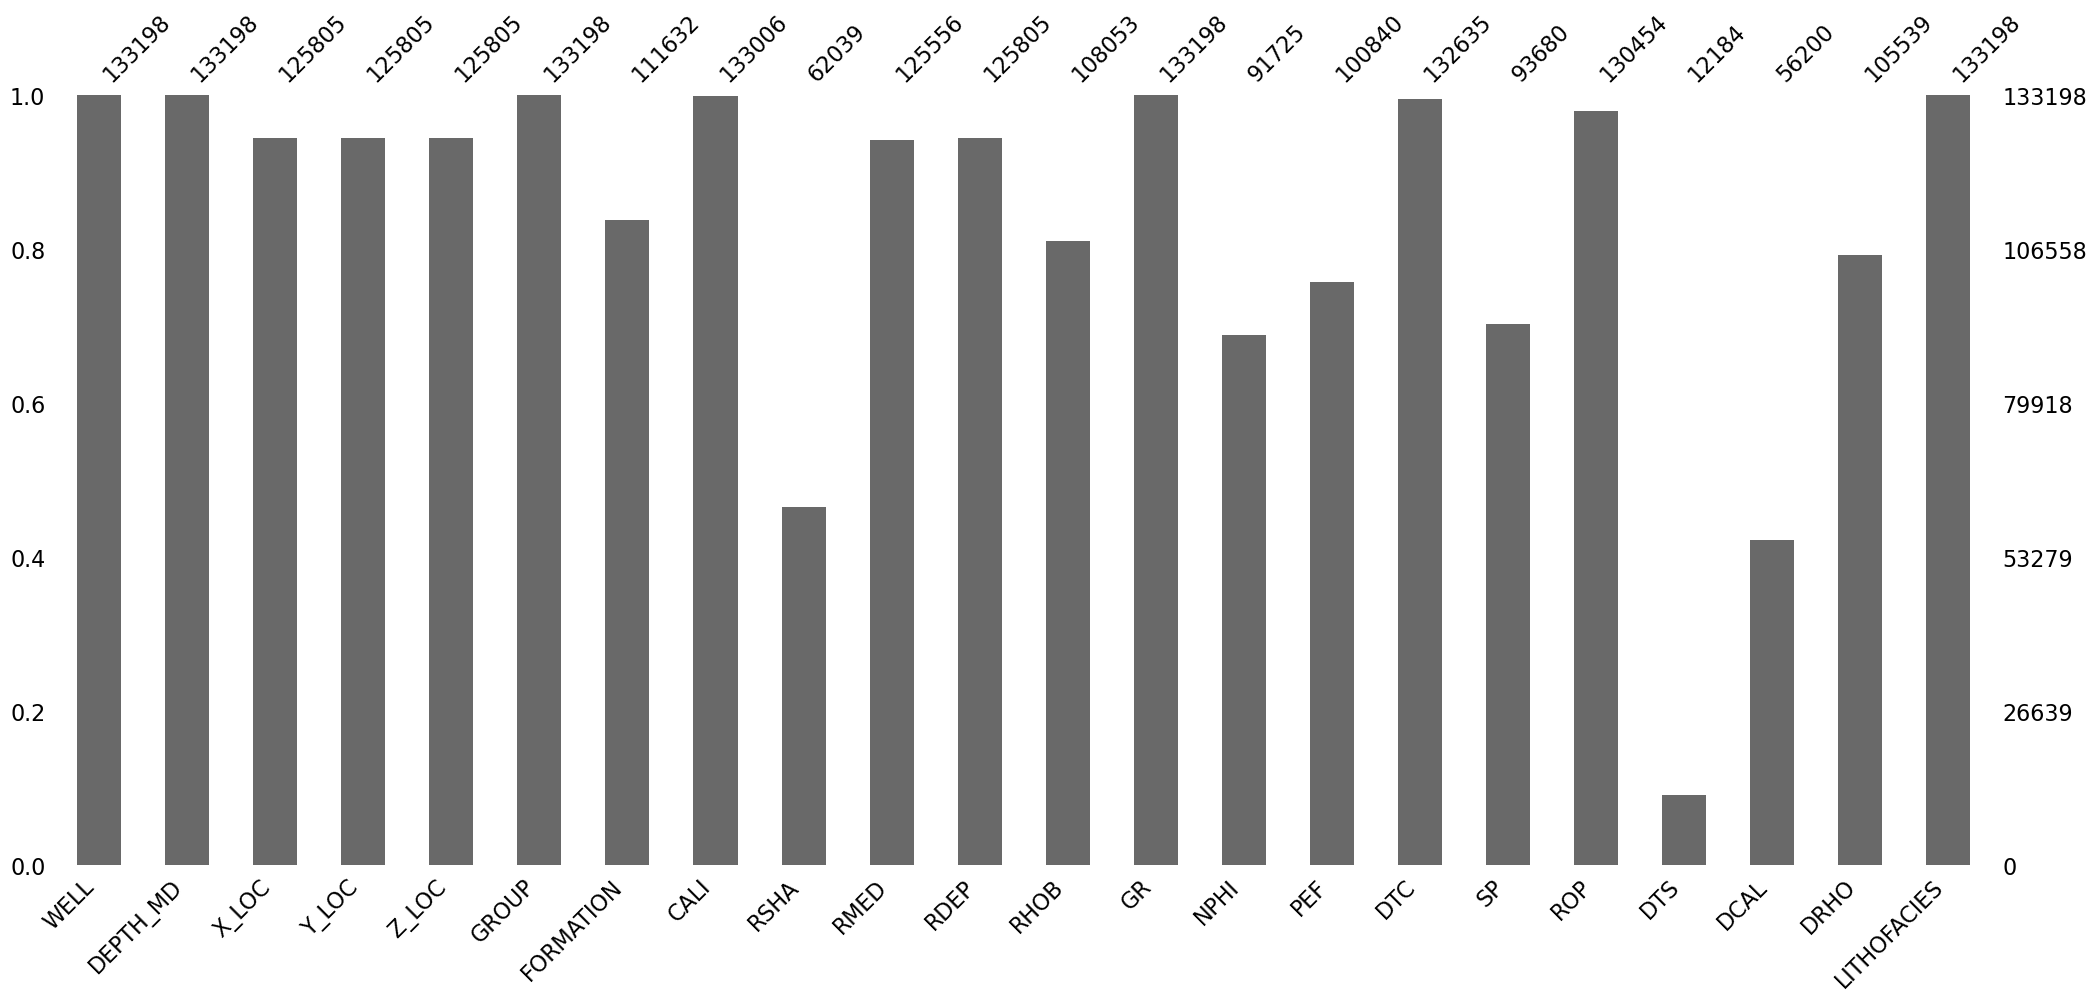

In [71]:
bar=msno.bar(df1)
bar

Basically, this plot displays the number of missing values for each column represented as a bar chart. It’s similar to the matrix plot but simpler to interpret.

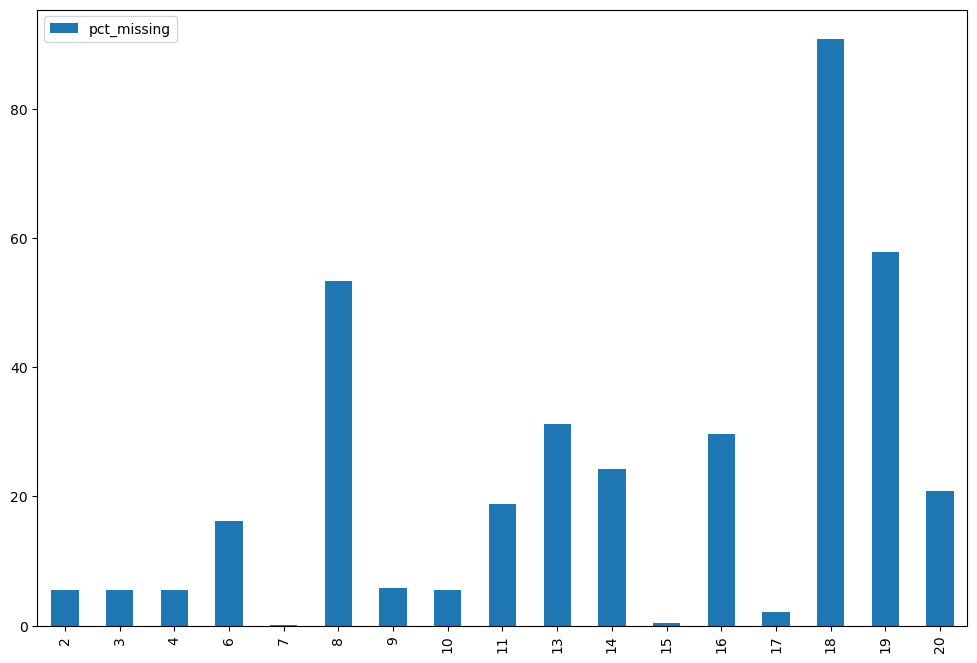

In [72]:
pct_missing_df1.loc[pct_missing_df1.pct_missing > 0].plot(kind='bar', figsize=(12,8))

plt.show()


<Axes: >

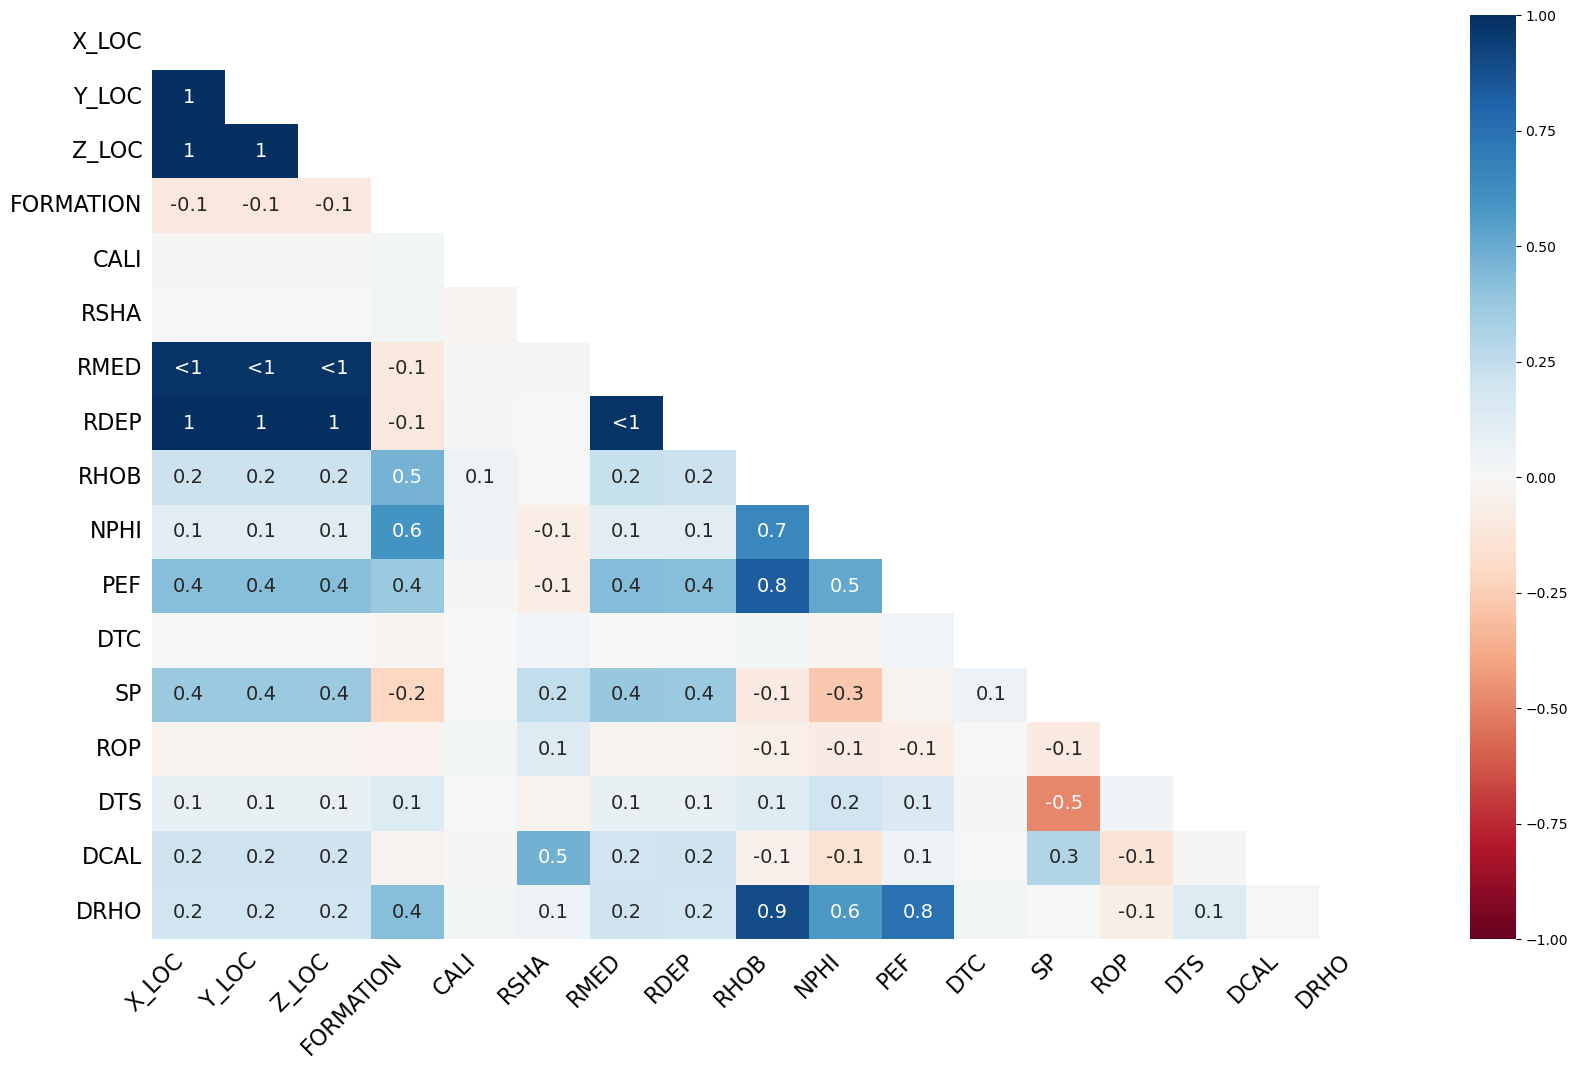

In [74]:
msno.heatmap(df1)

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.


Variables that are always full or always empty are not included in the visualization as they have no significant correlation.


The nullity correlation ranges from -1 to 1.


-1 - Exact Negative correlation represents that if the value of one variable is present then the value of other variables is definitely absent.

0 - No correlation represents that variables values present or absent do not have any effect on one another

1 - Exact Positive correlation represents that if the value of one variable is present then the value of the other is definitely present.

The heatmap works great for picking out data completeness relationships between variable pairs, but its explanatory power is limited when it comes to larger relationships and it has no particular support for extremely large datasets. For those, try the dendrogram instead.

<Axes: >

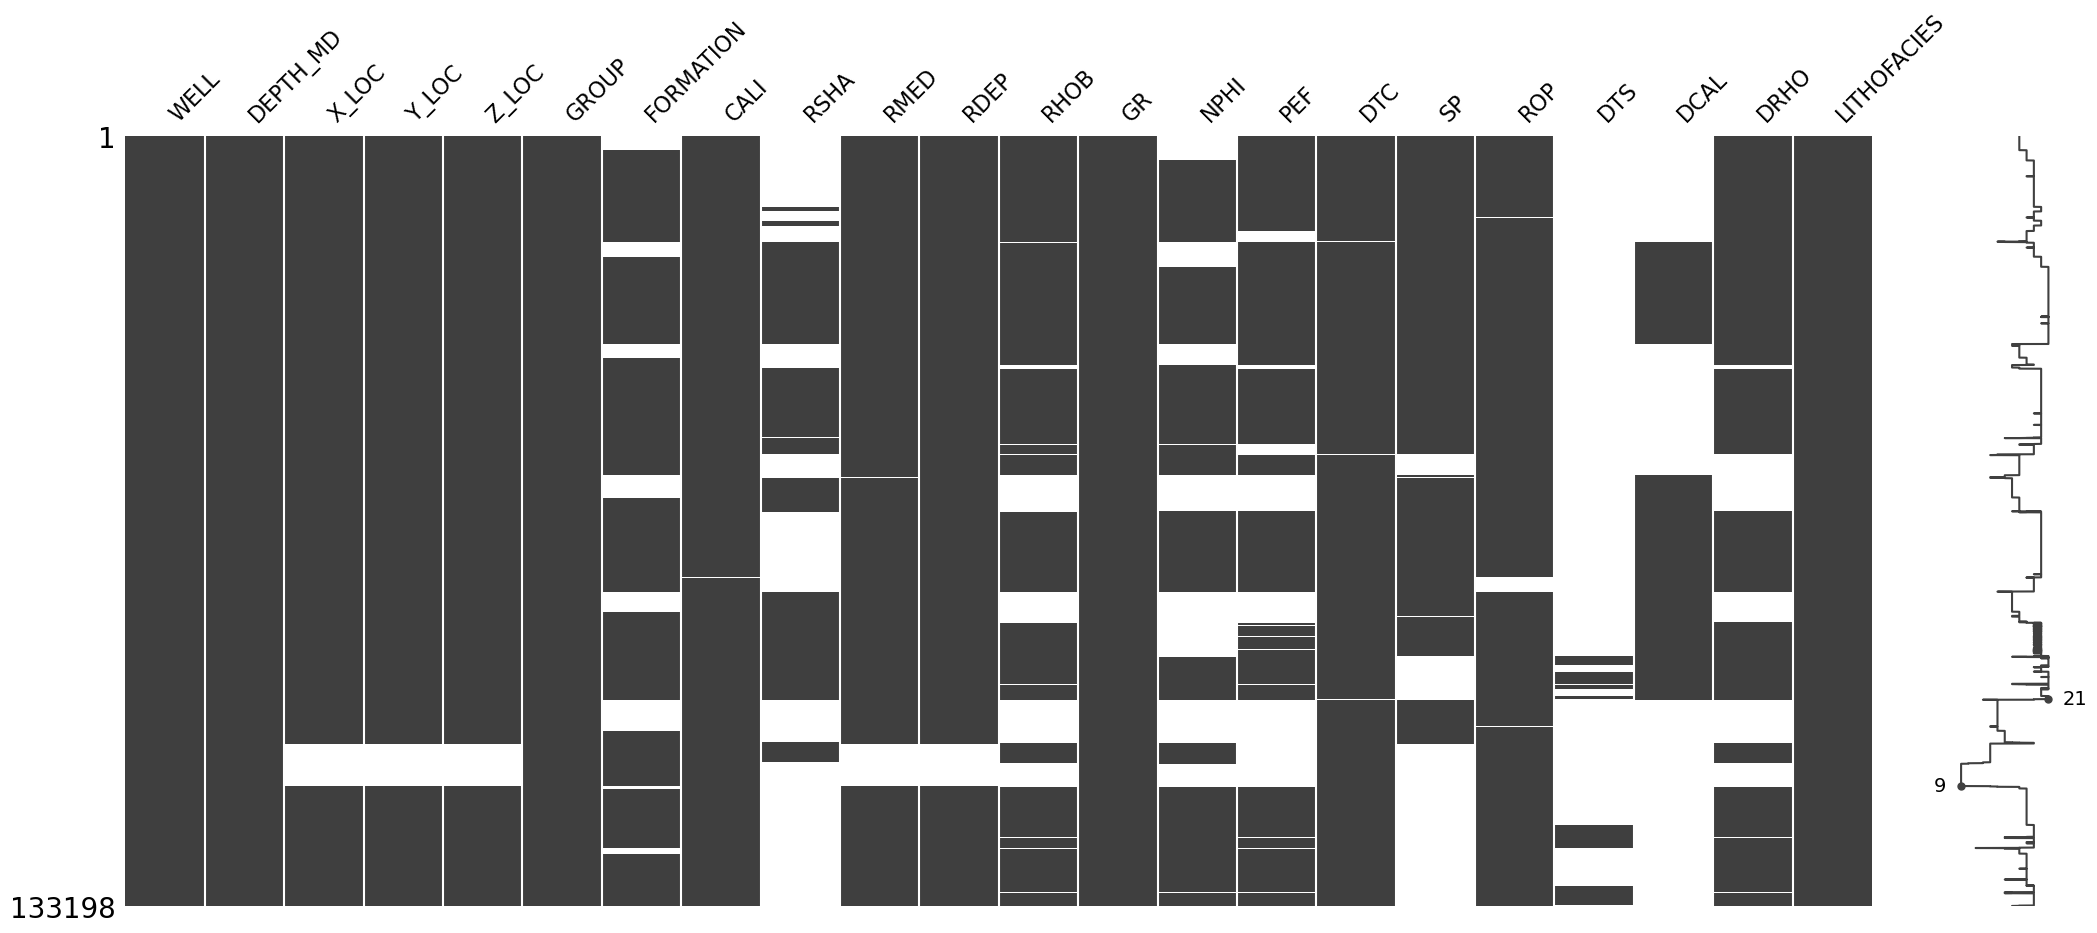

In [75]:
msno.matrix(df1)

White lines indicate the location of missing values.

The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

From the sparkline, we can see that there are observations without any missing values and the minimum number of values is 10, even for rows with the maximum nullity.

As you can see from above, we got a matrix-like plot, where each matrix cell color is based on whether the data exists or not.

If the color is dark, the data exists. If the color is white, the data is missing. From this plot, we have a picture of the proportion of missing data inside a row or a column.

<Axes: >

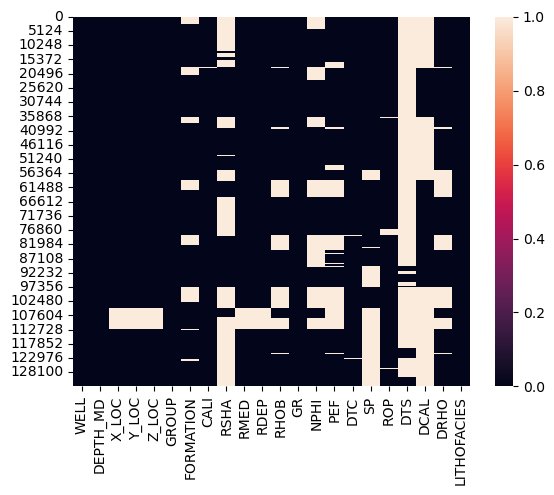

In [76]:
import seaborn as sns
sns.heatmap(df1.isna())

the y-axis show the index or number of rows

In [77]:
df1.shape

(133198, 22)

Well, if the column names are not easily readable you can always create its transposed version as below.

<Axes: >

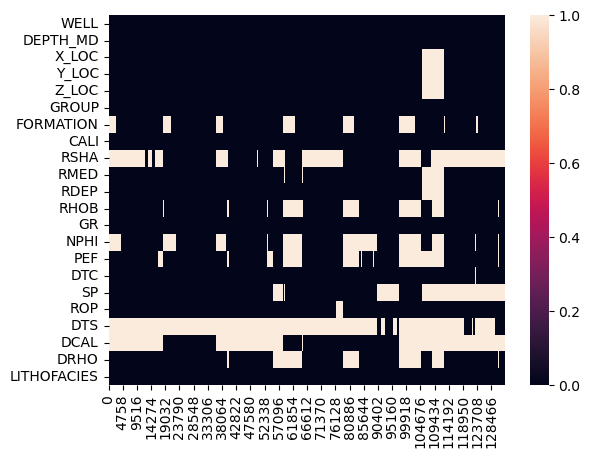

In [78]:
sns.heatmap(df1.isna().transpose())

Although heatmaps gives you an idea about the location of the missing data, it does not tell you about the amount of missing data

# Treating missing values 

#### Based on above observations you can use any of the below 3 methods to handle missing data.

**Drop the record** — Drop an entire record at an index, when a specific column has a missing value. Please be aware that this technique can drastically reduce the number of records in the dataset if the mentioned column has a huge number of missing values.

**Drop the column or feature** — This needs good research of a specific column to understand its importance in the future. You can do this only when you are confident that this feature does not provide any useful information, for example, PassengerId feature in this dataset.

**Impute missing data** — In this technique, you can substitute the missing values or NaNs with the mean or median or mode of the same column.

## Remove columns (features)

In [79]:
df1.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,GR,NPHI,PEF,DTC,SP,ROP,DTS,DCAL,DRHO,LITHOFACIES
0,15/09/2013,494.528,437641.9688,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,80.200851,NaN,20.915468,161.131180,24.612379,34.636410,NaN,NaN,-0.574928,65000
1,15/09/2013,494.680,437641.9688,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,79.262886,NaN,19.383013,160.603470,23.895531,34.636410,NaN,NaN,-0.570188,65000
2,15/09/2013,494.832,437641.9688,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,74.821999,NaN,22.591518,160.173615,23.916357,34.779556,NaN,NaN,-0.574245,65000
3,15/09/2013,494.984,437641.9688,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,72.878922,NaN,32.191910,160.149429,23.793688,39.965164,NaN,NaN,-0.586315,65000
4,15/09/2013,495.136,437641.9688,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,71.729141,NaN,38.495632,160.128342,24.104078,57.483765,NaN,NaN,-0.597914,65000


In [80]:
df1.isnull().sum()

WELL                0
DEPTH_MD            0
X_LOC            7393
Y_LOC            7393
Z_LOC            7393
GROUP               0
FORMATION       21566
CALI              192
RSHA            71159
RMED             7642
RDEP             7393
RHOB            25145
GR                  0
NPHI            41473
PEF             32358
DTC               563
SP              39518
ROP              2744
DTS            121014
DCAL            76998
DRHO            27659
LITHOFACIES         0
dtype: int64

In [81]:
df1.dropna(axis=1)   #remove columns with any single missing value
# 'any' : If any NA values are present, drop that row or column.

,WELL,DEPTH_MD,GROUP,GR,LITHOFACIES
0,15/09/2013,494.528000,NORDLAND GP.,80.200851,65000
1,15/09/2013,494.680000,NORDLAND GP.,79.262886,65000
2,15/09/2013,494.832000,NORDLAND GP.,74.821999,65000
3,15/09/2013,494.984000,NORDLAND GP.,72.878922,65000
4,15/09/2013,495.136000,NORDLAND GP.,71.729141,65000
...,...,...,...,...,...
133193,16/02/2016,2207.310396,ROTLIEGENDES GP.,127.456139,30000
133194,16/02/2016,2207.462396,ROTLIEGENDES GP.,128.403305,30000
133195,16/02/2016,2207.614396,ROTLIEGENDES GP.,127.829262,30000
133196,16/02/2016,2207.766396,ROTLIEGENDES GP.,126.552277,30000


In [82]:
df1.dropna(axis=1,how="all")   #remove columns with any single missing value  
# 'all': If all values are NA, drop that row or column.

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,GR,NPHI,PEF,DTC,SP,ROP,DTS,DCAL,DRHO,LITHOFACIES
0,15/09/2013,494.528000,437641.9688,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,80.200851,NaN,20.915468,161.131180,24.612379,34.636410,NaN,NaN,-0.574928,65000
1,15/09/2013,494.680000,437641.9688,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,79.262886,NaN,19.383013,160.603470,23.895531,34.636410,NaN,NaN,-0.570188,65000
2,15/09/2013,494.832000,437641.9688,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,74.821999,NaN,22.591518,160.173615,23.916357,34.779556,NaN,NaN,-0.574245,65000
3,15/09/2013,494.984000,437641.9688,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,72.878922,NaN,32.191910,160.149429,23.793688,39.965164,NaN,NaN,-0.586315,65000
4,15/09/2013,495.136000,437641.9688,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,71.729141,NaN,38.495632,160.128342,24.104078,57.483765,NaN,NaN,-0.597914,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/02/2016,2207.310396,476770.1250,6523587.5,-2180.926514,ROTLIEGENDES GP.,Skagerrak Fm.,8.698007,NaN,5.382444,...,127.456139,NaN,3.607062,NaN,NaN,22.291321,NaN,NaN,0.107520,30000
133194,16/02/2016,2207.462396,476770.1563,6523587.5,-2181.078613,ROTLIEGENDES GP.,Skagerrak Fm.,8.721210,NaN,5.651109,...,128.403305,NaN,3.609151,NaN,NaN,22.230320,NaN,NaN,0.101821,30000
133195,16/02/2016,2207.614396,476770.1563,6523587.5,-2181.230469,ROTLIEGENDES GP.,Skagerrak Fm.,8.739136,NaN,5.870602,...,127.829262,NaN,3.594580,NaN,NaN,22.388054,NaN,NaN,0.097832,30000
133196,16/02/2016,2207.766396,476770.1563,6523587.5,-2181.382324,ROTLIEGENDES GP.,Skagerrak Fm.,8.749738,NaN,5.756996,...,126.552277,NaN,3.534883,NaN,NaN,23.331690,NaN,NaN,0.092334,30000


In [83]:
df1.shape

(133198, 22)

## Removing Rows with Null Values

In [84]:
df1.dropna(axis=0)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,GR,NPHI,PEF,DTC,SP,ROP,DTS,DCAL,DRHO,LITHOFACIES


In [85]:
# remove missing values from x_loc

df1.dropna(subset="X_LOC",inplace=True)

In [86]:
df1.isnull().sum()

WELL                0
DEPTH_MD            0
X_LOC               0
Y_LOC               0
Z_LOC               0
GROUP               0
FORMATION       21566
CALI              192
RSHA            67025
RMED              264
RDEP                0
RHOB            21174
GR                  0
NPHI            37588
PEF             24984
DTC               544
SP              32139
ROP              2744
DTS            113621
DCAL            69615
DRHO            23696
LITHOFACIES         0
dtype: int64

### Remove columns of 40% missing values

Another way to tackle missing values in a dataset would be to drop those columns or features that have a significant percentage of values missing. Such columns don’t contain a lot of information and can be dropped altogether from the dataset. In our case, let us drop all those columns that have more than 40% values missing in them.

In [88]:
# Calculate the threshold for missing values
threshold = 0.4 * len(df1)
threshold

50322.0

In [89]:
(threshold/len(df1) ) *100

40.0

In [90]:
# Filter out columns with missing values equal to the threshold
columns_to_keep = df1.columns[df1.isnull().sum() > threshold]
df1_cleaned = df1[columns_to_keep]

In [91]:
df1_cleaned.isnull().sum()

RSHA     67025
DTS     113621
DCAL     69615
dtype: int64

In [92]:
df1.isnull().sum()

WELL                0
DEPTH_MD            0
X_LOC               0
Y_LOC               0
Z_LOC               0
GROUP               0
FORMATION       21566
CALI              192
RSHA            67025
RMED              264
RDEP                0
RHOB            21174
GR                  0
NPHI            37588
PEF             24984
DTC               544
SP              32139
ROP              2744
DTS            113621
DCAL            69615
DRHO            23696
LITHOFACIES         0
dtype: int64

In [93]:
df1.drop(columns_to_keep,axis=1,inplace=True)

In [94]:
df1.isnull().sum()

WELL               0
DEPTH_MD           0
X_LOC              0
Y_LOC              0
Z_LOC              0
GROUP              0
FORMATION      21566
CALI             192
RMED             264
RDEP               0
RHOB           21174
GR                 0
NPHI           37588
PEF            24984
DTC              544
SP             32139
ROP             2744
DRHO           23696
LITHOFACIES        0
dtype: int64

In [95]:
df1.shape #reduced from 22 to 19

(125805, 19)

###  Imputing Missing Values
It is important to keep in mind that imputing missing values with summary statistics like mean, median, or mode can introduce bias in the data, as it assumes that the missing values are similar to the non-missing values. Additionally, the choice of imputation method can also affect the performance of the machine learning model, as it can impact the relationships between variables in the dataset.


**Mean imputation** is often used when the missing values are numerical and the distribution of the variable is approximately normal.

**Median imputation** is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean.

**Mode imputation** is suitable for categorical variables or numerical variables with a small number of unique values.

## Using mean
Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values. Using mean values for replacing missing values may not create a great model and hence gets ruled out. For symmetric data distribution, one can use the mean value for imputing missing values.

One of the techniques is mean imputation in which the missing values are replaced with the mean value of the entire feature column. In the case of fields like salary, the data may be skewed as shown in the previous section. In such cases, it may not be a good idea to use mean imputation for replacing the missing values. Note that imputing missing data with mean values can only be done with numerical data.

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125805 entries, 0 to 133197
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   WELL         125805 non-null  object 
 1   DEPTH_MD     125805 non-null  float64
 2   X_LOC        125805 non-null  float64
 3   Y_LOC        125805 non-null  float64
 4   Z_LOC        125805 non-null  float64
 5   GROUP        125805 non-null  object 
 6   FORMATION    104239 non-null  object 
 7   CALI         125613 non-null  float64
 8   RMED         125541 non-null  float64
 9   RDEP         125805 non-null  float64
 10  RHOB         104631 non-null  float64
 11  GR           125805 non-null  float64
 12  NPHI         88217 non-null   float64
 13  PEF          100821 non-null  float64
 14  DTC          125261 non-null  float64
 15  SP           93666 non-null   float64
 16  ROP          123061 non-null  float64
 17  DRHO         102109 non-null  float64
 18  LITHOFACIES  125805 non-null 

In [97]:
df1.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'ROP',
       'DRHO', 'LITHOFACIES'],
      dtype='object')

In [98]:
df1['SP'].isna().sum()

32139

In [99]:
Mean_SP=df1['SP'].mean()
Mean_SP

91.61553655055185

In [100]:
df1['SP']=df1['SP'].fillna(Mean_SP)
df1['SP'].isna().sum()

0

In [101]:
df1.mean(numeric_only=True)

DEPTH_MD       1.757635e+03
X_LOC          4.512356e+05
Y_LOC          6.471392e+06
Z_LOC         -1.719215e+03
CALI           1.321827e+01
RMED           1.709011e+00
RDEP           1.743774e+00
RHOB           2.192840e+00
GR             7.273220e+01
NPHI           3.627092e-01
PEF            4.511796e+00
DTC            1.253845e+02
SP             9.161554e+01
ROP            2.941225e+01
DRHO           9.263453e-03
LITHOFACIES    6.233571e+04
dtype: float64

In [102]:
# Impute / Replace Missing Values with Mean
df1.fillna(df1.mean(numeric_only=True),inplace=True)

In [103]:
df1.isnull().sum()

WELL               0
DEPTH_MD           0
X_LOC              0
Y_LOC              0
Z_LOC              0
GROUP              0
FORMATION      21566
CALI               0
RMED               0
RDEP               0
RHOB               0
GR                 0
NPHI               0
PEF                0
DTC                0
SP                 0
ROP                0
DRHO               0
LITHOFACIES        0
dtype: int64

In [104]:
df1["FORMATION"].value_counts()

FORMATION
Utsira Fm.                40536
Skade Fm.                  9673
Skagerrak Fm.              7824
Smith Bank Fm.             7352
Hod Fm.                    6005
Tor Fm.                    5830
Lista Fm.                  4499
Sele Fm.                   2297
Aasgard Fm.                1980
Balder Fm.                 1915
Roedby Fm.                 1645
Draupne Fm.                1508
Ekofisk Fm.                1310
Grid Fm.                   1293
Frigg Fm.                  1190
Heather Fm.                1157
Svarte Fm.                 1071
Blodoeks Fm.               1019
Heimdal Fm.                1007
Hugin Fm.                   940
Kupferschiefer Fm.          718
Mandal Fm.                  645
Sola Fm.                    590
Ula Fm.                     572
Vaale Fm.                   546
Intra Draupne Fm. Sst.      388
Tuxen Fm.                   217
Statfjord Fm.               217
Hidra Fm.                   132
Sleipner Fm.                 99
Bryne Fm.                    6

## Impute / Replace Missing Values with Median
Another technique is median imputation in which the missing values are replaced with the median value of the entire feature column. When the data is skewed, it is good to consider using the median value for replacing the missing values. Note that imputing missing data with median value can only be done with numerical data

In [105]:
#Let's read the data again
df1 = pd.read_csv("xeek_train_subset.csv")

In [106]:
df1.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,GR,NPHI,PEF,DTC,SP,ROP,DTS,DCAL,DRHO,LITHOFACIES
0,15/09/2013,494.528,437641.9688,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,80.200851,NaN,20.915468,161.131180,24.612379,34.636410,NaN,NaN,-0.574928,65000
1,15/09/2013,494.680,437641.9688,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,79.262886,NaN,19.383013,160.603470,23.895531,34.636410,NaN,NaN,-0.570188,65000
2,15/09/2013,494.832,437641.9688,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,74.821999,NaN,22.591518,160.173615,23.916357,34.779556,NaN,NaN,-0.574245,65000
3,15/09/2013,494.984,437641.9688,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,72.878922,NaN,32.191910,160.149429,23.793688,39.965164,NaN,NaN,-0.586315,65000
4,15/09/2013,495.136,437641.9688,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,71.729141,NaN,38.495632,160.128342,24.104078,57.483765,NaN,NaN,-0.597914,65000


In [107]:
df1.fillna(df1.median(numeric_only=True),inplace=True)

In [108]:
df1.isnull().sum()

WELL               0
DEPTH_MD           0
X_LOC              0
Y_LOC              0
Z_LOC              0
GROUP              0
FORMATION      21566
CALI               0
RSHA               0
RMED               0
RDEP               0
RHOB               0
GR                 0
NPHI               0
PEF                0
DTC                0
SP                 0
ROP                0
DTS                0
DCAL               0
DRHO               0
LITHOFACIES        0
dtype: int64

In [109]:
print(df1['DTC'].max())
print(df1['DTC'].min())
print(df1['DTC'].unique())
print(df1['DTC'].nunique())

230.4329529
7.415132046
[161.1311798  160.6034699  160.1736145  ...  70.4621582   70.33759308
  70.00798035]
130456


## Impute / Replace Missing Values with Mode
Yet another technique is mode imputation in which the missing values are replaced with the mode value or most frequent value of the entire feature column. When the data is skewed, it is good to consider using mode values for replacing the missing values. For data points such as the salary field, you may consider using mode for replacing the values. Note that imputing missing data with mode values can be done with numerical and categorical data.

In [110]:
df1.isnull().sum()

WELL               0
DEPTH_MD           0
X_LOC              0
Y_LOC              0
Z_LOC              0
GROUP              0
FORMATION      21566
CALI               0
RSHA               0
RMED               0
RDEP               0
RHOB               0
GR                 0
NPHI               0
PEF                0
DTC                0
SP                 0
ROP                0
DTS                0
DCAL               0
DRHO               0
LITHOFACIES        0
dtype: int64

In [111]:
#categorical column
df1["FORMATION"].fillna(df1["FORMATION"].mode()[0],inplace=True)

In [112]:
df1.isnull().sum()

WELL           0
DEPTH_MD       0
X_LOC          0
Y_LOC          0
Z_LOC          0
GROUP          0
FORMATION      0
CALI           0
RSHA           0
RMED           0
RDEP           0
RHOB           0
GR             0
NPHI           0
PEF            0
DTC            0
SP             0
ROP            0
DTS            0
DCAL           0
DRHO           0
LITHOFACIES    0
dtype: int64

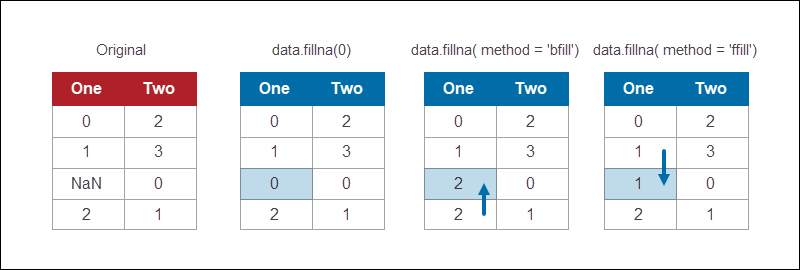

In [113]:
#Let's read the data again
df1 = pd.read_csv("xeek_train_subset.csv")

## Replacing with the previous value – forward fill
In some cases, imputing the values with the previous value instead of the mean, mode, or median is more appropriate. This is called forward fill. It is mostly used in time series data. You can use the ‘fillna’ function with the parameter ‘method = ffill’

In [114]:
df1.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC',
       'SP', 'ROP', 'DTS', 'DCAL', 'DRHO', 'LITHOFACIES'],
      dtype='object')

In [115]:
df1['FORMATION']=df1['FORMATION'].fillna('ffill')
df1['FORMATION'].isnull().sum()

0

In [116]:
#df1.isnull().sum()

## Replacing with the next value – backward fill

In backward fill, the missing value is imputed using the next value.

In [117]:
df1['ROP']=df1['ROP'].fillna('bfill')
df1['ROP'].isnull().sum()

0

In [118]:
df1.isnull().sum()

WELL                0
DEPTH_MD            0
X_LOC            7393
Y_LOC            7393
Z_LOC            7393
GROUP               0
FORMATION           0
CALI              192
RSHA            71159
RMED             7642
RDEP             7393
RHOB            25145
GR                  0
NPHI            41473
PEF             32358
DTC               563
SP              39518
ROP                 0
DTS            121014
DCAL            76998
DRHO            27659
LITHOFACIES         0
dtype: int64